<a href="https://colab.research.google.com/github/juanjaramillo98/ExposicionEspe/blob/main/advertising_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# iniciativa

Se busca un dataset que nos permita realizar un análisis de información concluyente y el cual proporcione suficientes insumos para realizar una propuesta de valor. El objetivo es analizar la viabilidad de un modelo predictivo basado en una regresión lineal

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df=pd.read_csv("https://raw.githubusercontent.com/juanjaramillo98/ExposicionEspe/main/advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#Paso 1: verificación y manejo de valores faltantes

In [4]:
print(df.isnull().sum())


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


No hay valores nulos en este conjunto de datos, por lo que no es necesario manejarlos.
El no tener valores nulos en el modelo previene sesgos y mejora la estabilidad del mismo.

# Paso 2:estadísticas descriptivas

In [5]:
print(df.describe())


               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


Las estadísticas descriptivas nos dan una idea de la distribución de los datos y posibles valores atípicos.
Observamos que las variables 'TV', 'Radio' y 'Newspaper' tienen rangos de valores bastante diferentes,
lo que sugiere que podrían tener escalas diferentes.

# Paso 3: visualizar la distribución de gastos en TV, Radio y Newspaper

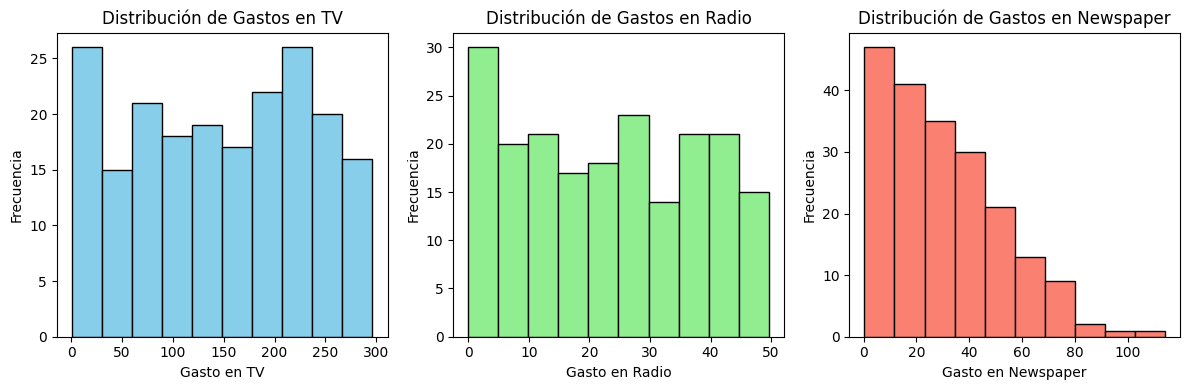

In [6]:
# Paso 3:visualizar la distribución de gastos en TV, Radio y Newspaper
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(df['TV'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Gastos en TV')
plt.xlabel('Gasto en TV')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
plt.hist(df['Radio'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribución de Gastos en Radio')
plt.xlabel('Gasto en Radio')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
plt.hist(df['Newspaper'], bins=10, color='salmon', edgecolor='black')
plt.title('Distribución de Gastos en Newspaper')
plt.xlabel('Gasto en Newspaper')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

#observamos que la distribución de gastos en Newspaper tiene una tendendencia de sesgo hacia la derecha;
#los valores atípicos de los gastos en Newspaper tienden a estar en el extremo inferior de la distribución
#Se observa una frecuencia alta en gastos bajos en Newspaper y un poco más normalizada en Radio y TV
#Los valores atípicos en gastos en TV y Radio parecen estar dispersos de manera más uniforme a lo largo de la distribución

# Paso 4: gráfico de dispersión para las ventas y los gastos en cada medio

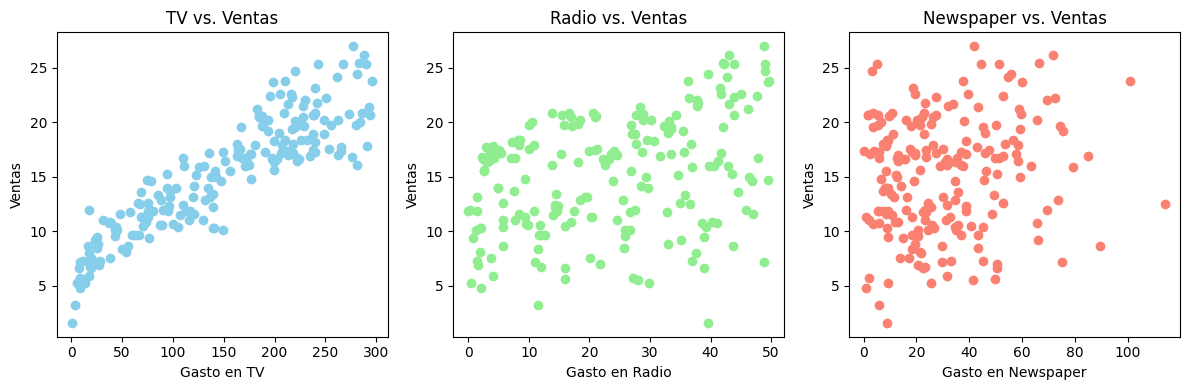

In [7]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(df['TV'], df['Sales'], color='skyblue')
plt.title('TV vs. Ventas')
plt.xlabel('Gasto en TV')
plt.ylabel('Ventas')

plt.subplot(1, 3, 2)
plt.scatter(df['Radio'], df['Sales'], color='lightgreen')
plt.title('Radio vs. Ventas')
plt.xlabel('Gasto en Radio')
plt.ylabel('Ventas')

plt.subplot(1, 3, 3)
plt.scatter(df['Newspaper'], df['Sales'], color='salmon')
plt.title('Newspaper vs. Ventas')
plt.xlabel('Gasto en Newspaper')
plt.ylabel('Ventas')

plt.tight_layout()
plt.show()
# Los gastos en TV parecen tener una relación lineal positiva con las ventas
# Por el contrario, el comportamiento en los puntos de Radio y Newspaper
# no siguen un patrón especígico que indique que haya una relación lineal
# En TV y Newspaper no se evidencia tampoco una tendencia de concentración de puntos en algún lugar específico



# Paso 5: matriz de correlación

In [8]:
correlation_matrix = df.corr()
print(correlation_matrix)


                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


La matriz de correlaciones nos confirma que existe una correlación positiva significativa entre gastos en TV y ventas
Lo anterior sugiere que a medida que aumenta el gasto en publicidad en TV, las ventas tienden a aumentar
Existe una correlación positiva entre gastos de publicidad de Radio y Ventas, pero no es tan fuerte como la anterior
La correlación entre el gasto en publicidad en Newspaper y ventas es bastante débil.
Lo anterior indica que los gastos en Newspaper tienen una influencia limitada en las ventas

# Paso 6: Mapa de calor de la matriz de correlación

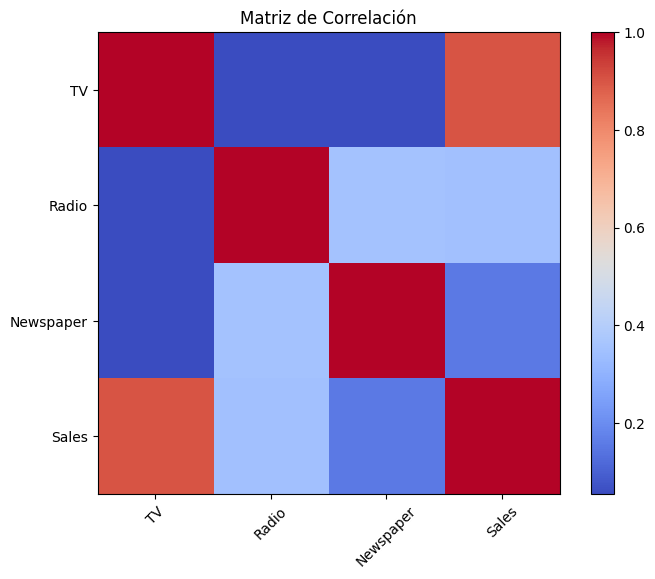

In [9]:

plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Matriz de Correlación')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()


Con este mapa de calor podemos evidenciar de manera más visual y rápida la correlación de las variables ya detalladas anteriormente
El color rojo indica una mayor correlación y el color azul una menor correlación.
De aquí podemos concluir que para realizar una regresión lineal, la variable TV es la más indicada


#Paso 7: split dataset en dataset de prueba y dataset de entrenamiento

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df["TV"],df["Sales"],test_size=0.1, random_state=42)
X_train = X_train.to_numpy().reshape(-1,1)
X_test = X_test.to_numpy().reshape(-1,1)

Se separan datos del dataset para tener con que probar el modelo final

# Paso 8: entrenamiento del modelo

In [11]:
reg = LinearRegression().fit(X_train, y_train)

Se realiza la regresión lineal con la parte de train del split

#Paso 9: prueba del modelo

In [12]:
print(reg.score(X_test, y_test))
print(reg.coef_)
print(reg.intercept_)

0.8071768727953934
[0.05513263]
7.044916461655207


Se prueba el modelo y se obtiene una puntuación del 80%.
Además, extraemos las características del modelo y obtenemos la sigueinte ecuación

$$
y = 0.05513263x + 7.044916461655207
$$


#Paso 10: gráfico de resultados

Text(0, 0.5, 'Ventas')

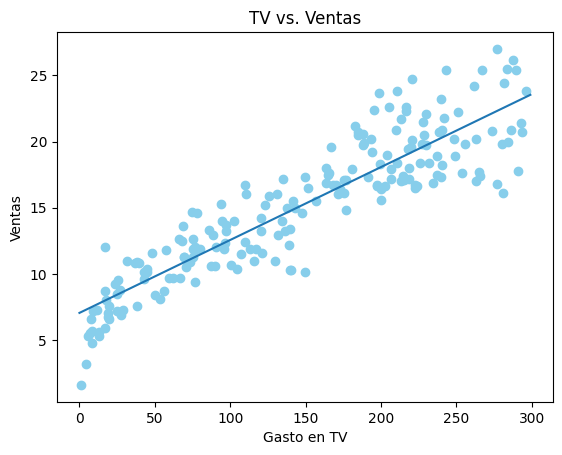

In [13]:
x = np.arange(300)
y = x*reg.coef_+reg.intercept_

plt.scatter(df['TV'], df['Sales'], color='skyblue')
plt.plot(x,y)
plt.title('TV vs. Ventas')
plt.xlabel('Gasto en TV')
plt.ylabel('Ventas')

Con el modelo listo ya podemos hacer predicciones

In [14]:
print(reg.predict(np.array([[50]])))

[9.801548]


#Resultados

El análisis de la información nos muestra que no existe una relación significativa entre las ventas y los gastos realizados en publicidad para radio y periódico. Además, muestra que si existe una relación directa entre el gasto en publicidad en televisión y las ventas.
la implementación de una regresión lineal nos dejó un modelo con el 80% de acierto lo cual puede ser útil para la toma de decisiones


# Trabajos Futuros.





* Realizar la regresión lineal con las variables que descartamos y evaluar si mejoran la exactitud del modelo
* Buscar un dataset más amplio con subcategorías por canal de distribución
* Implementar alguna otra regresión a los datos para ver si mejora la exactitud del modelo
